# Análisis dataset gob.bo PARTE 1

Analizando Datos de trámites del portal único de trámites de Bolivia. Datos obtenidos por web scraping. En esta parte se analiza

- Conteo de trámites
  - Por instituciones y categorías
- Actualizaciones de trámites
  -  Por instituciones y categorías
- Distribución de trámites por tipo (presencial o en línea)

In [86]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/gobbo_tramites_pre.csv', encoding='utf-8', sep="," )
df

,titulo,institucion,descripcion,contacto,web,es_presencial,es_en_linea,requisitos,procedimiento,num_ubicaciones,...,costo_formas,costo_conceptos,costo_ctas_bancarias,calificacion,url,categoria,duracion,marco_legal,costo_bancos,horarios_atencion
0,DECLARACIONES JURADAS - SIAT EN LÍNEA,Servicio de Impuestos Nacionales - SIN,Facilitar al contribuyente el cumplimiento de ...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nContar con las credenciales de acc...,PROCEDIMIENTO\nIngresar al siguiente enlace: h...,0,...,NaN,NaN,NaN,4,https://www.gob.bo/tramite/851,Impuestos,NaN,NaN,NaN,NaN
1,INSCRIPCIÓN AL RÉGIMEN DE REINTEGRO EN EFECTIV...,Servicio de Impuestos Nacionales - SIN,"El Régimen de Reintegro del IVA (Re-IVA), alca...",informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nCedula de Identidad vigente.\nN° d...,PROCEDIMIENTO\nIngresar al siguiente enlace pa...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2652,Impuestos,NaN,Ley 1355,NaN,NaN
2,REGISTRO AL PADRÓN NACIONAL DE CONTRIBUYENTES,Servicio de Impuestos Nacionales - SIN,Las Personas Naturales y Jurídicas que efectúe...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS INSCRIPCIÓN A TRAVÉS DEL SIAT EN LÍ...,PROCEDIMIENTO DE INSCRIPCIÓN\nIngresar al sigu...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/1367,Impuestos,NaN,NaN,NaN,NaN
3,INACTIVACIÓN DEL NIT,Servicio de Impuestos Nacionales - SIN,Procedimiento para inactivar el NIT,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nContar con las credenciales de acc...,PRODECIMIENTO\nIngresar al siguiente enlace ht...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2650,Impuestos,NaN,RND 10-0009-11,NaN,NaN
4,VERIFICADOR DE FACTURAS,Servicio de Impuestos Nacionales - SIN,Herramienta habilitada para verificar si las f...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITO\nContar la factura original.,PROCEDIMIENTO\nIngresar al siguiente enlace ht...,0,...,NaN,NaN,NaN,4,https://www.gob.bo/tramite/2654,Impuestos,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,PERMISO ESPECIAL DE CIRCULACION POR EXCESO DE ...,Administradora Boliviana de Carreteras - ABC,Obtencion de permiso especial para transitar c...,wgutierrez@abc.gob.bo,www.abc.gob.bo,1,0,llenado de formulario\npoliza de buena ejecuci...,NaN,1,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/291,Transporte,NaN,"Decreto Supremo Nº 25629, 24 de diciembre de 1999",NaN,08:00 - 18:00
1264,PERMISO DE CIURCULACION POR EXCESO DE DIMENSIONES,Administradora Boliviana de Carreteras - ABC,Obtencion de permiso para circular con exceso ...,wgutierrez@abc.gob.bo,www.abc.gob.bo,1,0,Nota Dirigida al Gerente Regional (Mencionando...,Presentar todos los requisitos en ventanilla ú...,9,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/296,Transporte,3 dias,"Decreto Supremo Nº 25629, 24 de diciembre de 1999",NaN,"08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:0..."
1265,USO DE BALANZA,Zona Franca Comercial e Industrial de Cobija -...,Brindar el servicio de pesaje a todos los tran...,MAEZOFRACOBIJA@GMAIL.COM,https://www.zofracobija.gob.bo/,1,0,Presentarse físicamente con el transporte en i...,Presentarse físicamente con el transporte en i...,0,...,Forma de pago: EFECTIVO,Concepto de pago: uso de balanza,-,0,https://www.gob.bo/tramite/2136,Transporte,20 minutos,R.A. Nº 20/2017,Banco Unión,NaN
1266,CERTIFICACIÓN DE NO SUSTANCIAS AGOTADORAS DE O...,Ministerio de Medio Ambiente y Agua - MINMAA,Otorgar la Certificación de No Sustancias Agot...,quinochavez@hotmail.com,www.mmaya.gob.bo,1,0,"Carta de Solicitud de Certificación de No SAO,...",El solicitante se apersona a oficinas de la Co...,0,...,NaN,NaN,NaN,0,https://www.gob.bo/tramite/1515,Transporte,10 dias,Compendio de normativas de gestión ambiental d...,NaN,NaN


In [87]:
# temas 
import plotly.io as pio
import plotly.express as px
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [88]:
# Eliminando duplicados
df = df.drop_duplicates(subset=['titulo'], keep='last')
df = df.drop_duplicates(subset=['url'], keep='last')
df.shape

(1268, 26)

## Tŕamites por institución

In [89]:
df['institucion'].unique()

array(['Servicio de Impuestos Nacionales - SIN',
       'Autoridad de Impugnación Tributaria - AIT',
       'Gobierno Autónomo Departamental de Cochabamba - GADC',
       'Empresa Pùblica Departamental de Servicios Eléctricos Tarija SETAR - SETAR',
       'Consejo de la Magistratura - CM',
       'Agencia Estatal de Vivienda - AEVIVIENDA',
       'Tribunal Departamental de Justicia de Santa Cruz - TDJ-SCZ',
       'Ministerio de Obras Públicas, Servicios y Vivienda - MINOPSV',
       'Consejo Nacional de Vivienda Policial - COVIPOL',
       'Centro de Comunicaciones La Paz - CCLP',
       'Ministerio de Culturas y Turismo - MINCULT',
       'Autoridad de Desarrollo del Cine y Audiovisuales - ADECINE',
       'Ministerio de Trabajo, Empleo y Previsión Social - MTEPS',
       'Servicio Nacional de Propiedad Intelectual - SENAPI',
       'Pro – Bolivia - PRO-BOL',
       'Ministerio de Desarrollo Productivo y Economía Plural - MDPyEP',
       'Servicio de Desarrollo de las Empresas Públic

Parece que muchos nombres de instituciones son distintos pero se refieren a la misma institución, por ejemplo:
- Ministerio de Educación de Bolivia - MINEDU
- MINISTERIO DE EDUCACIÓN - MINEDU

Se va a mantener solamente un nombre.

In [90]:
nombres_mapa = {
    'Ministerio de Educación de Bolivia - MINEDU': 'MINISTERIO DE EDUCACIÓN - MINEDU',
    'Ministerio\xa0de\xa0Desarrollo\xa0Rural\xa0y\xa0Tierras - MDRyT': 'Ministerio de Desarrollo Rural y Tierras - MDRyT',
    'Fondo Nacional de Solidaridad y Equidad - FNSE - FNSE': 'Fondo Nacional de Solidaridad y Equidad - FNSE'
}


def get_value_using_map(value, value_map):
    if value_map.get(value, None) is not None:
        return value_map[value]
    return value
        

df['institucion'] = df['institucion'].apply(lambda x: get_value_using_map(x, nombres_mapa))
df['institucion'].unique()

array(['Servicio de Impuestos Nacionales - SIN',
       'Autoridad de Impugnación Tributaria - AIT',
       'Gobierno Autónomo Departamental de Cochabamba - GADC',
       'Empresa Pùblica Departamental de Servicios Eléctricos Tarija SETAR - SETAR',
       'Consejo de la Magistratura - CM',
       'Agencia Estatal de Vivienda - AEVIVIENDA',
       'Tribunal Departamental de Justicia de Santa Cruz - TDJ-SCZ',
       'Ministerio de Obras Públicas, Servicios y Vivienda - MINOPSV',
       'Consejo Nacional de Vivienda Policial - COVIPOL',
       'Centro de Comunicaciones La Paz - CCLP',
       'Ministerio de Culturas y Turismo - MINCULT',
       'Autoridad de Desarrollo del Cine y Audiovisuales - ADECINE',
       'Ministerio de Trabajo, Empleo y Previsión Social - MTEPS',
       'Servicio Nacional de Propiedad Intelectual - SENAPI',
       'Pro – Bolivia - PRO-BOL',
       'Ministerio de Desarrollo Productivo y Economía Plural - MDPyEP',
       'Servicio de Desarrollo de las Empresas Públic

### Cantidad de trámites por institución

In [91]:
df.groupby('institucion').count()['titulo'].sort_values(ascending=False)

institucion
MINISTERIO DE EDUCACIÓN - MINEDU                                               165
Gobierno Autonomo Municipal de Trinidad - GAMT                                  71
Gobierno Autónomo Departamental de Cochabamba - GADC                            66
Servicio Nacional de Propiedad Intelectual - SENAPI                             65
Servicio Plurinacional de Registro de Comercio - SEPREC                         58
                                                                              ... 
Autoridad de Fiscalización y Control de Pensiones y Seguros - APS                1
Transportes Aéreos Bolivianos - TAB                                              1
Autoridad de Fiscalización y Control del Sistema Nacional de Salud - ASINSA      1
Unidad de Proyectos Especiales - UPRE                                            1
Universidad Autónoma Gabriel René Moreno - UAGRM                                 1
Name: titulo, Length: 123, dtype: int64

In [92]:
###
## Utilitarios
###

def barchart_vertical(x_series, y_series, title='',
                      y_title='', x_title='',
                      color=None, text_auto=True,
                      showlegend=False,
                      color_map=None,
                      labels=None,
                      height=640, template='ggplot2', textfont_size=12):
    """ 
    Función para graficar barras verticales con plotly
    """
    fig = px.bar(x=x_series, y=y_series,
             color=color,
             text_auto=True,
             height=height,
             template=template,
             labels=labels,
             color_discrete_map=color_map,
             title=title)

    fig.update_traces(showlegend=showlegend)
    fig.update_layout(coloraxis_showscale=False, )
    fig.update_layout(yaxis_title=y_title, xaxis_title=x_title)
    # fondo blanco
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
    
    fig.update_traces(textfont_size=textfont_size, textangle=0, textposition="outside", cliponaxis=False)
    fig.show()


def barchart_horizontal(y_series, x_series, title='',
                        y_title='', x_title='',
                        color=None, text_auto=True,
                        showlegend=False,
                        color_map=None,
                        labels=None,
                        height=640, template='ggplot2', text_fontsize=12):
    """
    Función para graficar barras horizontales con plotly
    """
    fig = px.bar(y=y_series, x=x_series,  color=color,
             orientation='h',
             text_auto=True,
             height=height,
             labels=labels,
             template=template,
             color_discrete_map=color_map,
             title=title)

    fig.update_traces(showlegend=showlegend)
    fig.update_layout(coloraxis_showscale=False, )
    fig.update_layout(
        yaxis_title=y_title, xaxis_title=x_title,
    )
    fig.update_layout(
            plot_bgcolor='rgba(0,0,0,0)'
    )
    
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.show()

## Instituciones estatales con más trámites

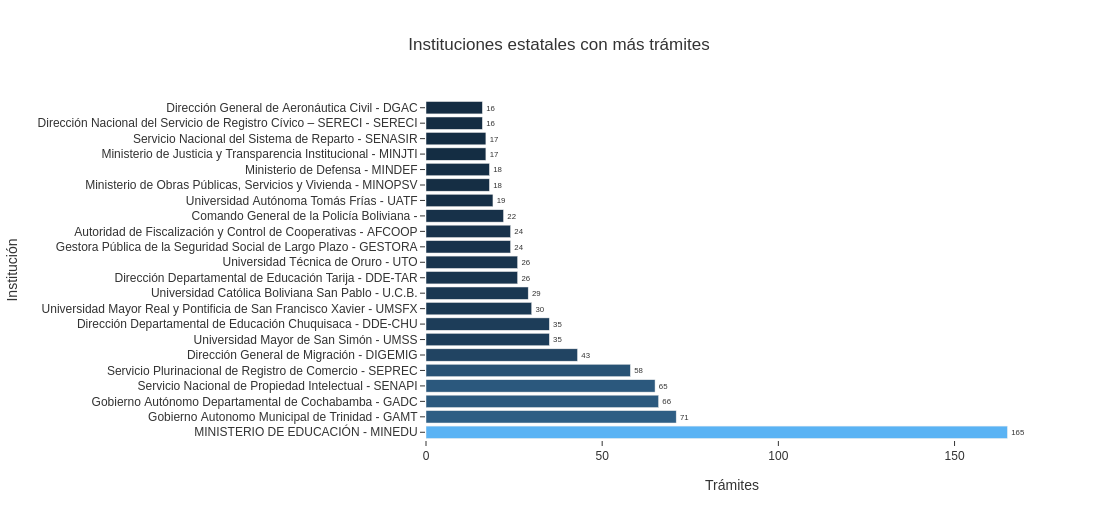

In [93]:
serie = df.groupby('institucion').count()['titulo'].sort_values(ascending=False)
n_samples = int(len(serie)*0.18) # solo una porcion

barchart_horizontal(serie[:n_samples].index, serie[:n_samples].values,
                    title='Instituciones estatales con más trámites',
                    y_title='Institución',
                    x_title='Trámites',
                    height=520,
                    color=serie[:n_samples].values,
                   )

### Distribución de trámites por institución

El siguiente gráfico estaría mostrando el conteo de trámintes por institución. La parte ancha dice que hay más instituciones que tienen entre 0 y 10 trámites 

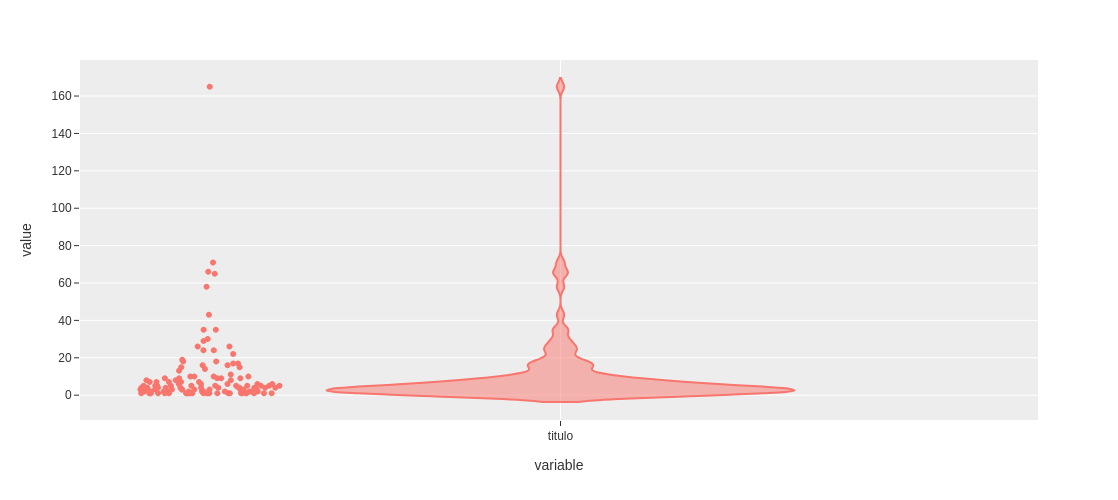

In [94]:
import plotly.figure_factory as ff

serie = df.groupby('institucion').count()['titulo'].sort_values(ascending=False)

fig = px.violin(serie, 
                points='all', 
                height=500,
                template='ggplot2')
fig.show()

## Agregar distribución de trámites por institución y categoría

In [95]:
df.head(3)

,titulo,institucion,descripcion,contacto,web,es_presencial,es_en_linea,requisitos,procedimiento,num_ubicaciones,...,costo_formas,costo_conceptos,costo_ctas_bancarias,calificacion,url,categoria,duracion,marco_legal,costo_bancos,horarios_atencion
0,DECLARACIONES JURADAS - SIAT EN LÍNEA,Servicio de Impuestos Nacionales - SIN,Facilitar al contribuyente el cumplimiento de ...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nContar con las credenciales de acc...,PROCEDIMIENTO\nIngresar al siguiente enlace: h...,0,...,NaN,NaN,NaN,4,https://www.gob.bo/tramite/851,Impuestos,NaN,NaN,NaN,NaN
1,INSCRIPCIÓN AL RÉGIMEN DE REINTEGRO EN EFECTIV...,Servicio de Impuestos Nacionales - SIN,"El Régimen de Reintegro del IVA (Re-IVA), alca...",informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS\nCedula de Identidad vigente.\nN° d...,PROCEDIMIENTO\nIngresar al siguiente enlace pa...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/2652,Impuestos,NaN,Ley 1355,NaN,NaN
2,REGISTRO AL PADRÓN NACIONAL DE CONTRIBUYENTES,Servicio de Impuestos Nacionales - SIN,Las Personas Naturales y Jurídicas que efectúe...,informaciontributaria@impuestos.gob.bo,https://www.impuestos.gob.bo/,0,1,REQUISITOS INSCRIPCIÓN A TRAVÉS DEL SIAT EN LÍ...,PROCEDIMIENTO DE INSCRIPCIÓN\nIngresar al sigu...,0,...,NaN,NaN,NaN,3,https://www.gob.bo/tramite/1367,Impuestos,NaN,NaN,NaN,NaN


In [96]:
df.groupby(['institucion', 'categoria']).count().reset_index()

,institucion,categoria,titulo,descripcion,contacto,web,es_presencial,es_en_linea,requisitos,procedimiento,...,costo_montos,costo_formas,costo_conceptos,costo_ctas_bancarias,calificacion,url,duracion,marco_legal,costo_bancos,horarios_atencion
0,Administración de Servicios Portuarios – Boliv...,Gobierno,15,15,15,15,15,15,15,15,...,1,1,1,1,15,15,6,15,1,10
1,Administradora Boliviana de Carreteras - ABC,Transporte,6,6,6,6,6,6,6,4,...,0,1,1,0,6,6,2,6,0,6
2,Aduana Nacional - AN,Económico-Productivo,3,3,3,3,3,3,3,2,...,0,0,0,0,3,3,0,3,0,3
3,Agencia Estatal de Medicamentos y Tecnologías ...,Salud,11,7,11,11,11,11,11,11,...,9,10,10,9,11,11,11,11,9,1
4,Agencia Estatal de Vivienda - AEVIVIENDA,Bienes Inmuebles,8,8,8,8,8,8,8,1,...,0,0,0,0,8,8,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Yacimientos Petrolíferos Fiscales Bolivianos -...,Económico-Productivo,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,1,2,0,2
181,Yacimientos Petrolíferos Fiscales Bolivianos -...,Gobierno,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
182,Yacimientos Petrolíferos Fiscales Bolivianos -...,Transporte,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,0,2,0,2
183,Zona Franca Comercial e Industrial de Cobija -...,Identificación,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


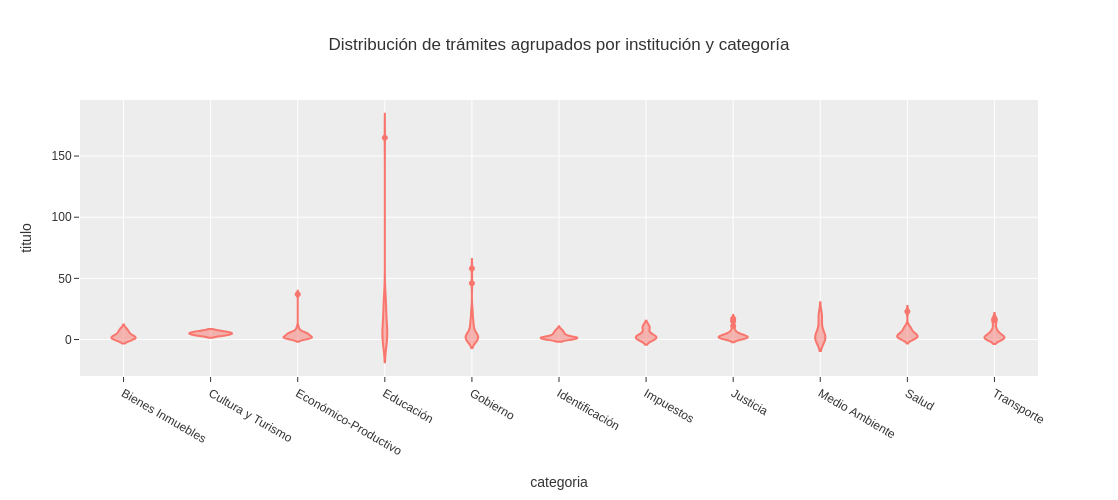

In [97]:
fig = px.violin(df.groupby(['categoria', 'institucion']).count().reset_index(), 
                x='categoria',
                y='titulo',
                title='Distribución de trámites agrupados por institución y categoría',
                #points='all', 
                # color='institucion',
                height=500,
                template='ggplot2')
fig.show()

## Distribución de trámites por categorías



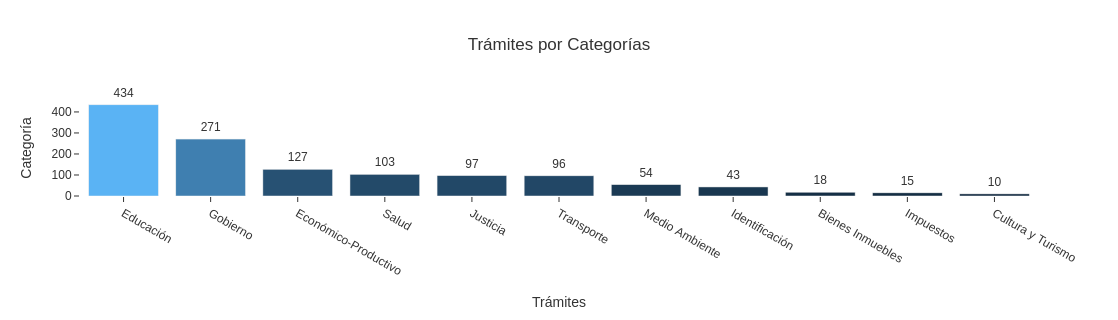

In [98]:
serie = df.groupby('categoria').count()['titulo'].sort_values(ascending=False)
#n_samples = int(len(serie)*0.18)
n_samples = len(serie)

barchart_vertical(serie.index, serie.values, color=serie[:n_samples].values,
                   title='Trámites por Categorías', height=320,
                  y_title='Categoría', x_title='Trámites')

Esta Visualización muestra que hay más trámites con categoría "Educación" y "Gobierno". Esto podría ser un indicador de que estas dos categorías son **las más burocráticas** ya que además tienen comparativamente más trámites que otras categorías. Probablemente valdría la pena hacer un análisis separado para las primeras categorías.

## Actualizaciones de trámites

### trámites que nunca se actualizarón

In [99]:
df['ultima_actualizacion']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
1263    16-11-2021 12:15
1264    16-11-2021 12:14
1265    09-10-2019 12:19
1266    09-10-2019 12:18
1267    09-10-2019 12:18
Name: ultima_actualizacion, Length: 1268, dtype: object

In [100]:
print('Total:', df[df['ultima_actualizacion'].isna()].shape[0])

Total: 71


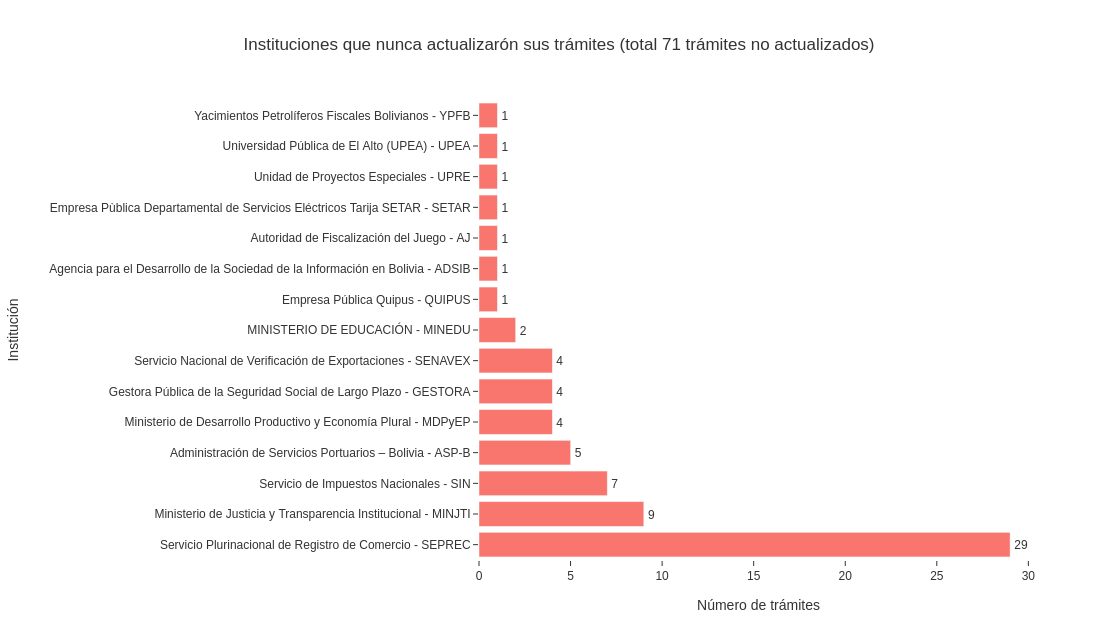

In [101]:
_df = df[df['ultima_actualizacion'].isna()].groupby('institucion').count().sort_values(by=['titulo'], ascending=False)
sin_actualizacion = df[df['ultima_actualizacion'].isna()].shape[0]

barchart_horizontal(_df.index, _df['titulo'],
                    title=f'Instituciones que nunca actualizarón sus trámites (total {sin_actualizacion} trámites no actualizados)',
                    y_title="Institución", x_title="Número de trámites",
                   )

In [102]:
df['last_update'] = df['ultima_actualizacion'].apply(lambda dt: str(dt)[:10])
df['last_update']

0              nan
1              nan
2              nan
3              nan
4              nan
           ...    
1263    16-11-2021
1264    16-11-2021
1265    09-10-2019
1266    09-10-2019
1267    09-10-2019
Name: last_update, Length: 1268, dtype: object

In [103]:
df.groupby(by='last_update').count().reset_index()[['titulo','last_update']].sort_values(by='titulo')

,titulo,last_update
123,1,30-12-2022
6,1,01-12-2021
16,1,02-09-2023
110,1,27-08-2021
111,1,27-09-2021
...,...,...
104,35,25-04-2023
26,59,05-08-2023
113,65,28-04-2023
124,71,nan


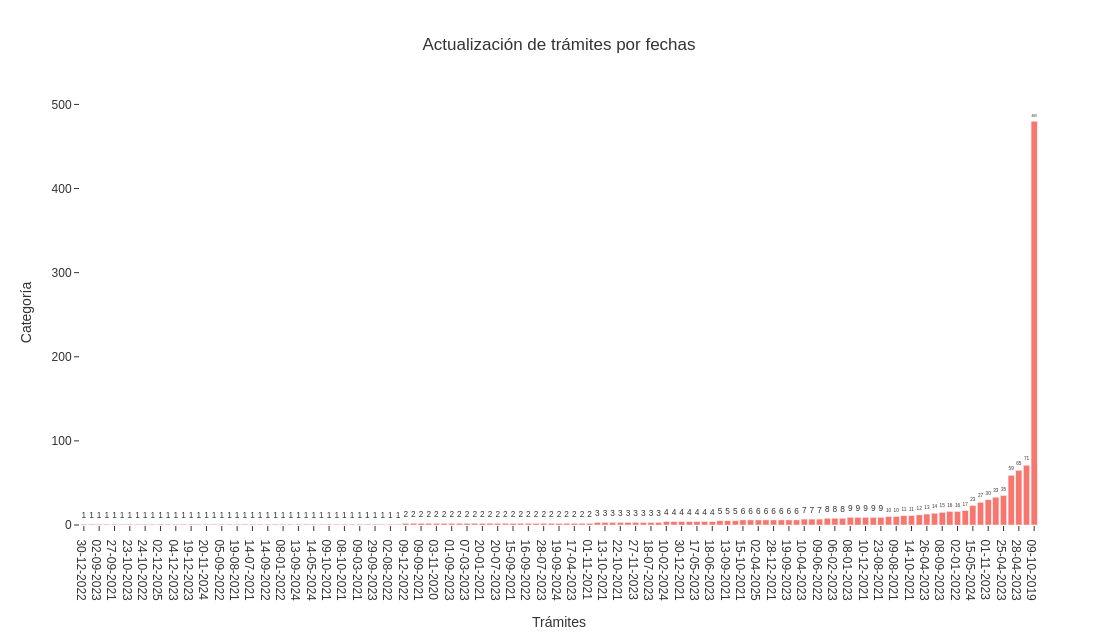

In [104]:
_df = df.groupby(by='last_update').count().reset_index()[['titulo','last_update']].sort_values(by='titulo')

barchart_vertical(_df['last_update'], _df['titulo'],
                 title='Actualización de trámites por fechas',
                 x_title="Trámites",y_title="Categoría"
                 )

La anterior visualización no es muy entendible, creo conviene agrupar por meses y año primero.

In [105]:
df['ultima_actualizacion'].apply(lambda dt: str(dt)[:10])

0              nan
1              nan
2              nan
3              nan
4              nan
           ...    
1263    16-11-2021
1264    16-11-2021
1265    09-10-2019
1266    09-10-2019
1267    09-10-2019
Name: ultima_actualizacion, Length: 1268, dtype: object

In [106]:
df['ultima_actualizacion'].apply(lambda dt: str(dt)[6:10])

0           
1           
2           
3           
4           
        ... 
1263    2021
1264    2021
1265    2019
1266    2019
1267    2019
Name: ultima_actualizacion, Length: 1268, dtype: object

In [107]:
df['año_update'] = df['ultima_actualizacion'].apply(lambda dt: str(dt)[6:10])
df.sample(4)[['titulo', 'año_update', 'categoria', 'institucion', 'url']]

,titulo,año_update,categoria,institucion,url
786,SERVICIO DE PAGO DE RENTAS MEDIANTE ABONO AUTO...,2019,Gobierno,Servicio Nacional del Sistema de Reparto - SEN...,https://www.gob.bo/tramite/1649
787,TRAMITE NRO. 23 ~ REGISTRO DE CONTRATOS COMERC...,2023,Gobierno,Servicio Plurinacional de Registro de Comercio...,https://www.gob.bo/tramite/3144
195,DIPLOMA ACADEMICO - APOSTILLA,2023,Educación,Universidad Mayor de San Simón - UMSS,https://www.gob.bo/tramite/2085
603,RELACIÓN DOCENTE - ESTUDIANTE,2019,Educación,Universidad Mayor Real y Pontificia de San Fra...,https://www.gob.bo/tramite/2268


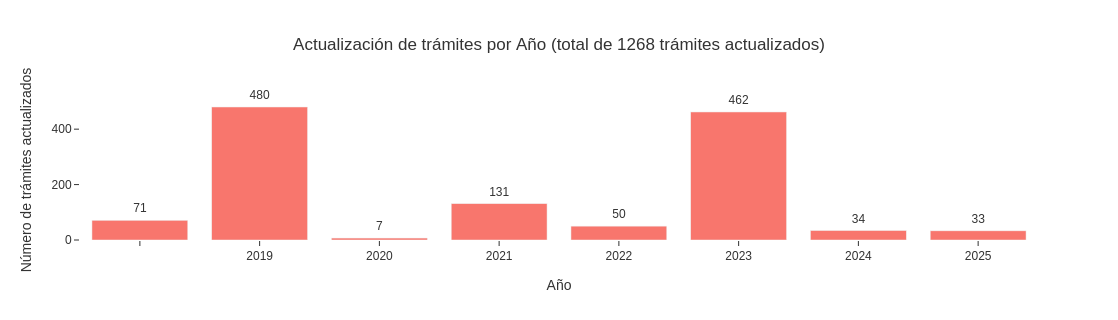

In [108]:
_df = df.groupby('año_update').size().reset_index(name="num_tramites_año")
barchart_vertical(_df['año_update'], _df['num_tramites_año'],
                  f'Actualización de trámites por Año (total de {df.shape[0]} trámites actualizados)',
                  y_title='Número de trámites actualizados', x_title='Año',
                  height=320
)

### Actualizaciones por Año Mes

In [109]:
df['año-mes_update'] = df['ultima_actualizacion'].apply(lambda dt: str(dt)[6:10] + '-' + str(dt)[3:5])
df.sample(4)[['titulo', 'año-mes_update', 'categoria', 'institucion', 'url']]

,titulo,año-mes_update,categoria,institucion,url
1136,CORRECCION DE CERTIFICADO DE NACIDO VIVO YA EM...,2019-10,Salud,Gobierno Autónomo Departamental de Cochabamba ...,https://www.gob.bo/tramite/1977
602,ACTA DE DEFENSA DE MODALIDAD DE GRADUACIÓN,2019-10,Educación,Universidad Católica Boliviana San Pablo - U.C.B.,https://www.gob.bo/tramite/2064
653,OTORGACIÓN DE PERSONALIDAD JURÍDICAPARA COOPER...,2023-04,Gobierno,Autoridad de Fiscalización y Control de Cooper...,https://www.gob.bo/tramite/222
505,LEGALIZACIÓN RESOLUCIÓN MINISTERIAL DE VISACIÓN,2023-11,Educación,MINISTERIO DE EDUCACIÓN - MINEDU,https://www.gob.bo/tramite/2891


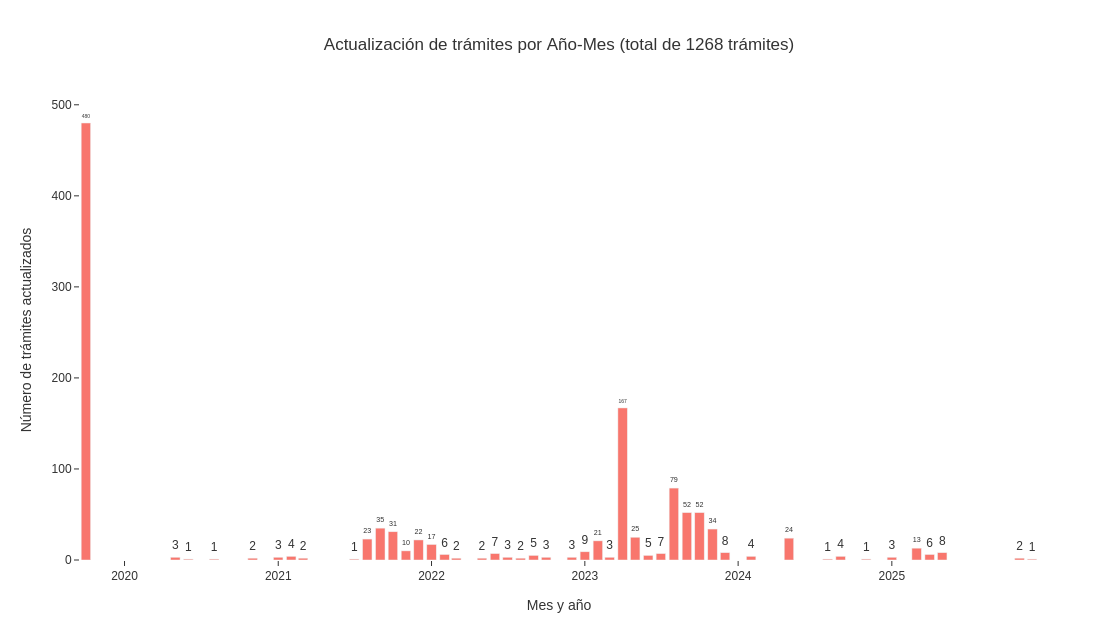

In [110]:
_df = df.groupby('año-mes_update').size().reset_index(name="num_tramites_año_mes")

barchart_vertical(_df['año-mes_update'], _df['num_tramites_año_mes'],
                  f'Actualización de trámites por Año-Mes (total de {df.shape[0]} trámites)',
                  y_title='Número de trámites actualizados', x_title='Mes y año')


Lo anterior muestra que la mayor actualizacion de trámites ocurrió en octubre de 2019, que es poco después de que se publicara la plataforma. Aparte de esto:

- **En 2020 se actualizarón muy pocos trámites**: Esto parece normal ya que los procedimientos para los trámites deberían variar poco en el lapsop de un año.
- **En 2021 se actualizaron alrededor de 130 trámites**: Mostrando mayor actividad luego de mitad de año
- **En 2022 se actualizaron mucho menos trámites que en 2021**
- **2023 fue el año con mayor cantidad de actualizaciones desde el lanzamiento del portal**: Con más de 450 trámites actualizados, esto muestra que ha habido actividad y mantenimiento de parte de las instituciones, podría valer la pena hacer un análisis de que trámites, instituciones o categorías fueron actualizados.
- **2024 y 2025 tienen pocas actualizaciones**: Esto podría ser una señal de abandono de la actualización de trámites por parte de las instituciones que prefieren actualizarlos en sus sitios oficiales (según un D.S. esto no debería ser así).

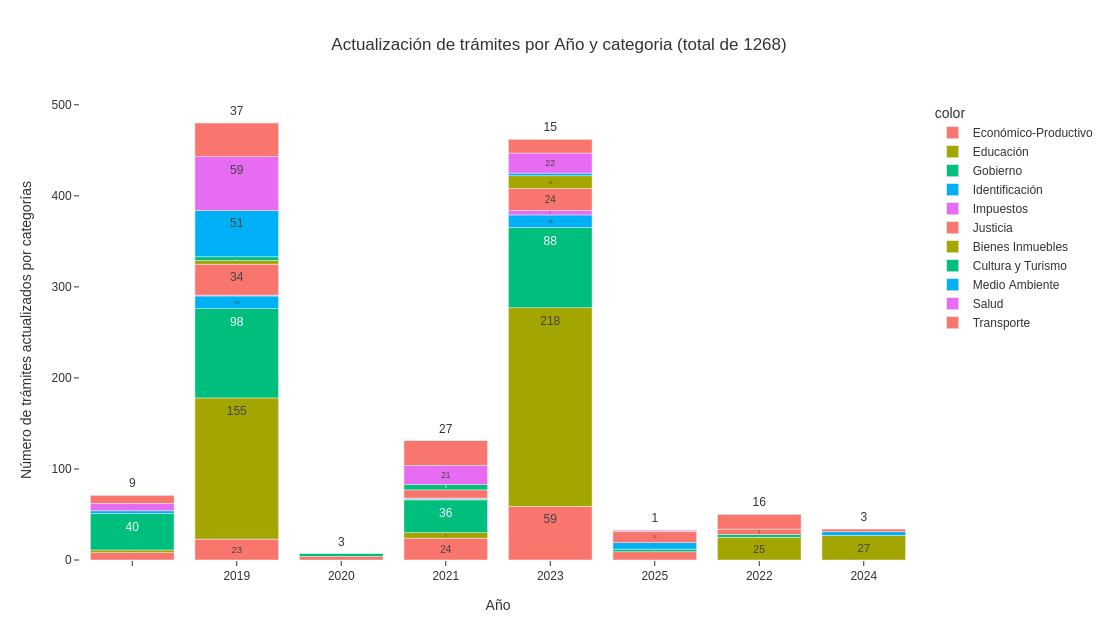

In [117]:
_df = df.groupby(['año_update', 'categoria']).size().reset_index(name="tramites_actualizados_categoria")

barchart_vertical(_df['año_update'], _df['tramites_actualizados_categoria'],
                  color=_df['categoria'],
                  showlegend=True,
                  title=f'Actualización de trámites por Año y categoria (total de {df.shape[0]})',
                  y_title='Número de trámites actualizados por categorías', x_title='Año')

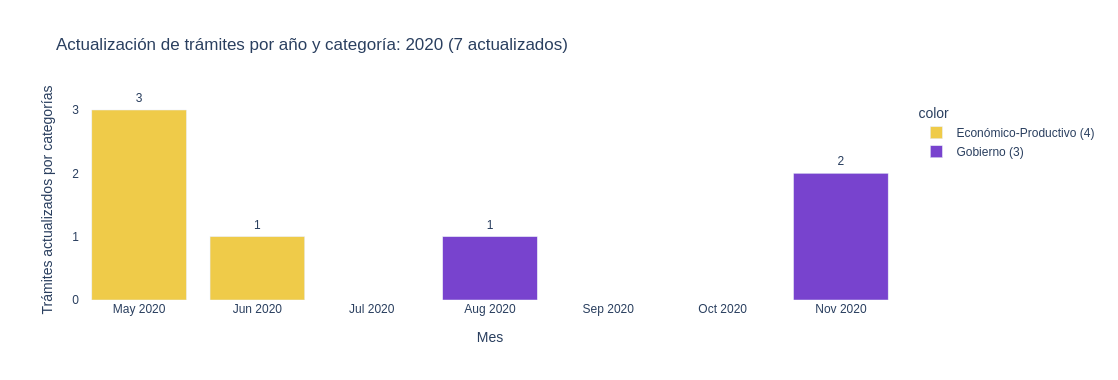

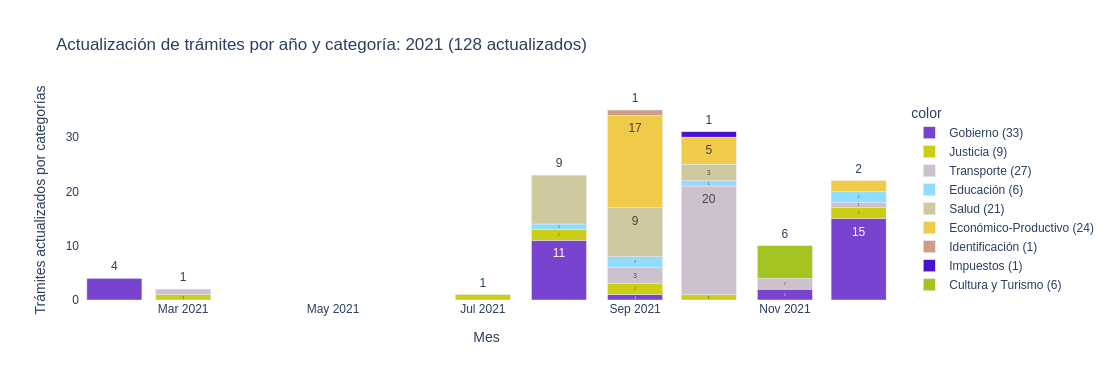

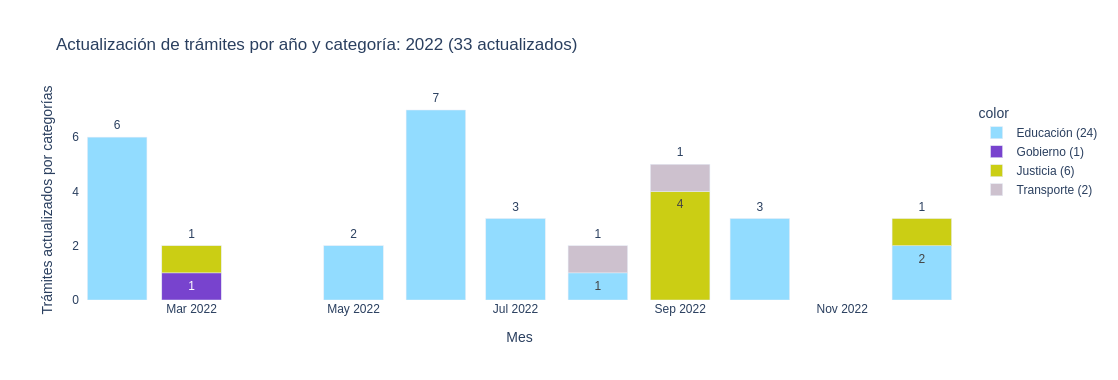

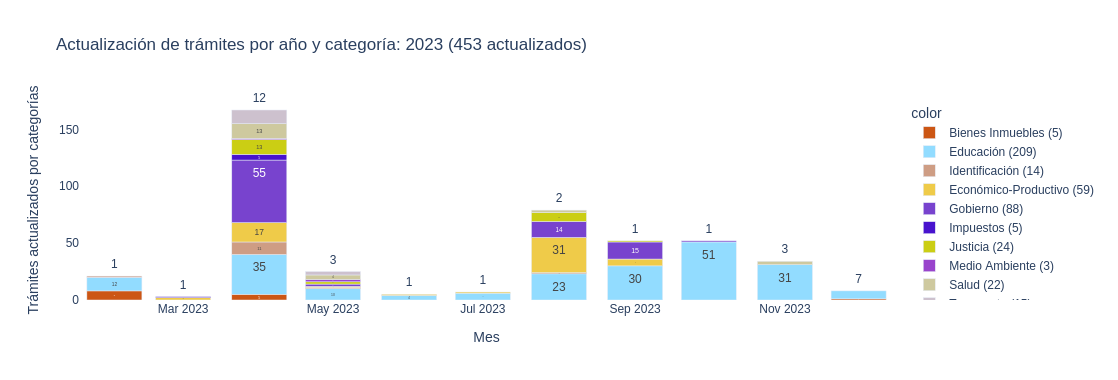

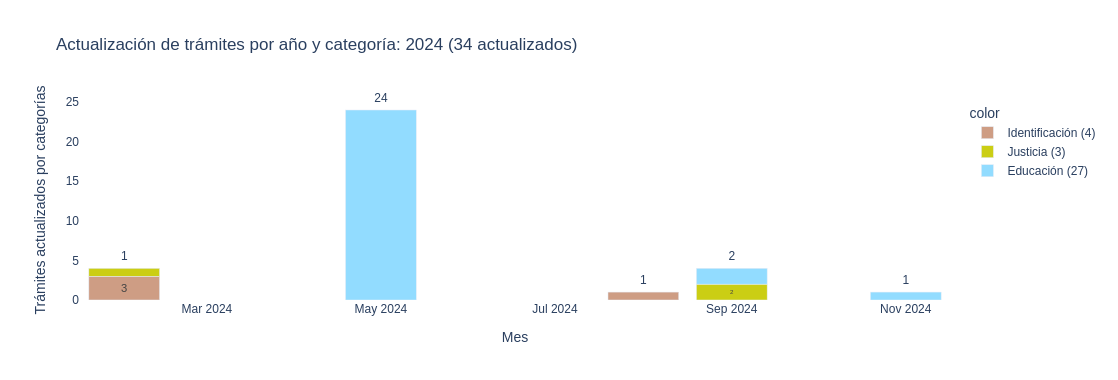

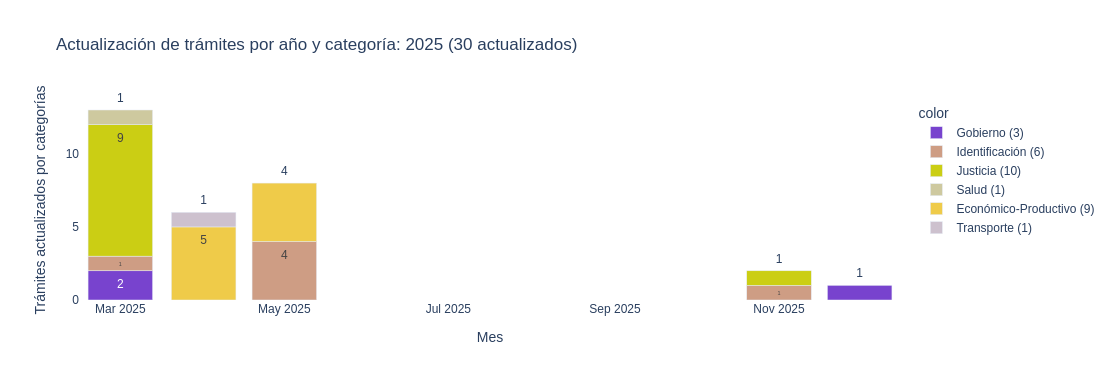

In [121]:
###### Actualizacion por de trámites por cada año

anios = [
    ('2020-01-01', '2020-12-31'),
    ('2021-01-01', '2021-12-31'), ('2022-01-01', '2022-12-31'),
    ('2023-01-01', '2023-12-31'), ('2024-01-01', '2024-12-31'),
    ('2025-01-01', '2025-12-31')
]

colors_map = {}
def color_categoria(categoria_text):
    """Ayuda asignar un color para una categoria"""
    if categoria_text.startswith('Gobierno'):
        return '#7843ce'
    if categoria_text.startswith('Impuestos'):
        return '#4813ce'
    elif categoria_text.startswith('Bienes Inmuebles'):
        return '#cc5614'
    elif categoria_text.startswith('Cultura y Turismo'):
        return '#a4c521'
    elif categoria_text.startswith('Económico-Productivo'):
        return '#efcb49'
    elif categoria_text.startswith('Educación'):
        return '#92dcff'
    elif categoria_text.startswith('Identificación'):
        return '#ce9d84'
    elif categoria_text.startswith('Justicia'):
        return '#cbce14'
    elif categoria_text.startswith('Medio Ambiente'):
        return '#94c'
    elif categoria_text.startswith('Salud'):
        return '#cec99f'
    elif categoria_text.startswith('Transporte'):
        return '#cdc1ce'

for anio in anios:
    _df = df.groupby(['año-mes_update', 'categoria']).size().reset_index(name="tramites_actualizados_categoria")
    _df = _df.loc[(_df['año-mes_update']>=anio[0]) & (_df['año-mes_update']<anio[1])]

    # conteo de trámites actualizados por categorías
    count_df = _df.groupby('categoria').sum()['tramites_actualizados_categoria']

    value_counts =  _df['categoria'].value_counts()
    # renombrando columna para mostrar tambien el total de cada categoría en las leyendas
    labels={
        'Impuestos': f"Impuestos ({count_df.get('Impuestos', '')})",
        'Bienes Inmuebles': f"Bienes Inmuebles ({count_df.get('Impuestos', '')})",
        'Cultura y Turismo': f"Cultura y Turismo ({count_df.get('Cultura y Turismo', '')})",
        'Económico-Productivo': f"Económico-Productivo ({count_df.get('Económico-Productivo', '')})",
        'Educación': f"Educación ({count_df.get('Educación', '')})",
        'Gobierno': f"Gobierno ({count_df.get('Gobierno', '')})",
        'Identificación': f"Identificación ({count_df.get('Identificación', '')})",
        'Justicia': f"Justicia ({count_df.get('Justicia', '')})",
        'Medio Ambiente': f"Medio Ambiente ({count_df.get('Medio Ambiente', '')})",
        'Salud': f"Salud ({count_df.get('Salud', '')})",
        'Transporte': f"Transporte ({count_df.get('Transporte', '')})",
    }

    # asignando un color a cada categoria original
    _df['categoria'] = _df['categoria'].apply(lambda val: labels[val])

    # asignando un color a cada categoria original
    colors_map  = {}
    for category in labels.values():
        colors_map[category] = color_categoria(category)

    barchart_vertical(_df['año-mes_update'], _df['tramites_actualizados_categoria'],
                  color=_df['categoria'],
                  title=f'Actualización de trámites por año y categoría: {anio[0][:4]} ({_df['tramites_actualizados_categoria'].sum()} actualizados)',
                  y_title='Trámites actualizados por categorías', x_title='Mes',
                  color_map=colors_map,
                  template='plotly',
                  height=380,
                  showlegend=True,
                  labels=labels
                )


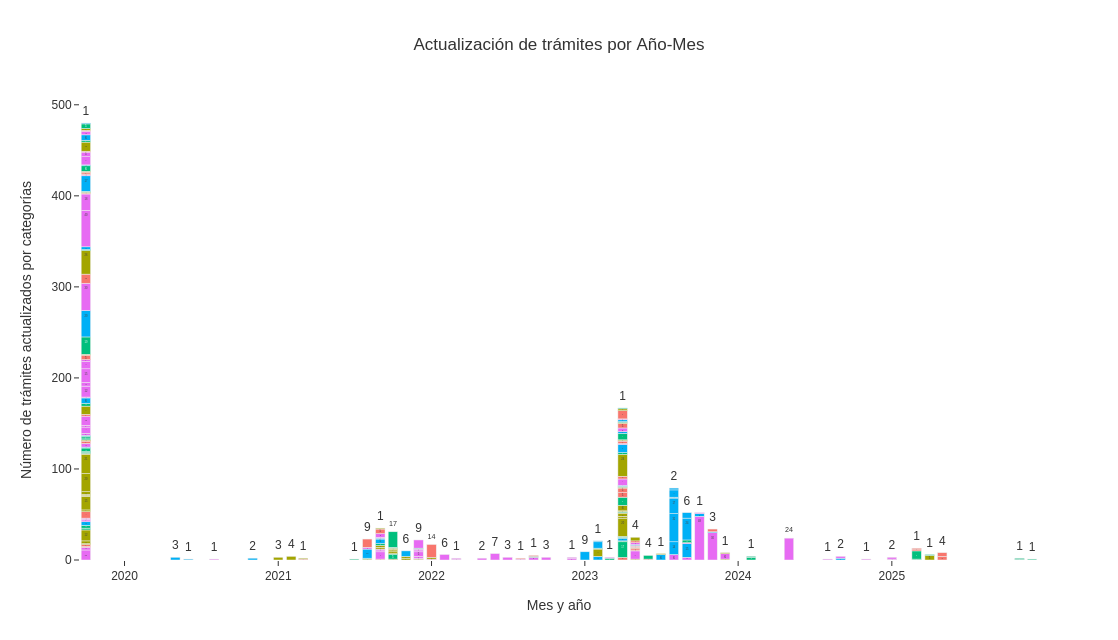

In [123]:
_df = df.groupby(['año-mes_update', 'categoria', 'institucion']).size().reset_index(name="tramites_actualizados_categoria")
#_df[['año-mes_update']>'2022-01-01']]
barchart_vertical(_df['año-mes_update'], _df['tramites_actualizados_categoria'],
                  color=_df['institucion'],
                  title=f'Actualización de trámites por Año-Mes',
                  y_title='Número de trámites actualizados por categorías', x_title='Mes y año')

In [ ]:
## TODO: - Distribución de trámites por tipo (presencial o en línea)